In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import gc
import datetime



In [3]:
df_sales = pd.read_csv('/content/drive/MyDrive/DS Project/stock_data_source_0.csv')
df_correction = pd.read_csv('/content/drive/MyDrive/DS Project/correction_data_source_0.csv')

In [4]:
df_sales.head()

,store_id,art_no,mikg_art_no,tunit_no,tunit_qty,var_no,date_of_day,var_tu_key,art_no2,RECPT_QTY_COLLI,stock_qty_colli,sell_qty_colli,SC Colli
0,10,89381,98985,1,1,1,2021-09-30,1001,89381,NaN,0.0,NaN,NaN
1,10,534426,645750,1,1,1,2021-09-30,1001,534426,NaN,0.0,NaN,NaN
2,10,512095,632928,1,1,1,2021-09-30,1001,512095,NaN,0.0,NaN,NaN
3,10,81319,89919,1,1,1,2021-09-30,1001,81319,NaN,0.0,NaN,NaN
4,10,60194,69698,1,1,1,2021-09-30,1001,60194,NaN,0.0,NaN,NaN


In [5]:
df_correction.head(2)

,store_id,store_desc,art_no,ART_NAME,mikg_art_no,mikg_art_name,tunit_no,tunit_qty,ART_NAME0,var_no,VAR_DESC,ART_NAME1,date_of_day,DAY_DESC,ST_CHANGE_TYPE_CD,ST_CHANGE_TYPE_DESC,var_tu_key,var_tu_name,SC_Colli,SC_NNBP
0,10,MCC RU 10 MOW - LENINGRADSKOE SHOSSE,537205,ЯБЛОКИ СЕЗОННЫЕ СОРТ. КНОП. 12,644616,ЯБЛОКИ СЕЗОННЫЕ СОРТ. КНОП. 12,1,1,ЯБЛОКИ СЕЗОННЫЕ СОРТ. КНОП. 12,1,"СТАНД-АРТ,",ЯБЛОКИ СЕЗОННЫЕ СОРТ. КНОП. 12,2019-03-08,08.03.19 Fri,13,Own consumption,1001,"СТАНД-АРТ, , 1.0",-61.6,-4675.44
1,10,MCC RU 10 MOW - LENINGRADSKOE SHOSSE,301604,400Г БРОККОЛИ 20-40 ММ МИРАТОРГ,528409,400Г БРОККОЛИ 20-40 ММ МИРАТОРГ,1,1,400Г БРОККОЛИ 20-40 ММ МИРАТОРГ,1,"СТАНД-АРТ,",400Г БРОККОЛИ 20-40 ММ МИРАТОРГ,2019-03-01,01.03.19 Fri,13,Own consumption,1001,"СТАНД-АРТ, , 1.0",-20.0,-918.00


In [6]:
#useful for the merge function later on
# use lower case letter for columns name

df_sales.columns = df_sales.columns.str.replace(' ','_')
df_sales.columns = map(str.lower, df_sales.columns)
df_correction.columns = df_correction.columns.str.replace(' ','_')
df_correction.columns = map(str.lower, df_correction.columns)

In [7]:
df_sales.columns

Index(['store_id', 'art_no', 'mikg_art_no', 'tunit_no', 'tunit_qty', 'var_no',
       'date_of_day', 'var_tu_key', 'art_no2', 'recpt_qty_colli',
       'stock_qty_colli', 'sell_qty_colli', 'sc_colli'],
      dtype='object')

In [8]:
df_correction.columns

Index(['store_id', 'store_desc', 'art_no', 'art_name', 'mikg_art_no',
       'mikg_art_name', 'tunit_no', 'tunit_qty', 'art_name0', 'var_no',
       'var_desc', 'art_name1', 'date_of_day', 'day_desc', 'st_change_type_cd',
       'st_change_type_desc', 'var_tu_key', 'var_tu_name', 'sc_colli',
       'sc_nnbp'],
      dtype='object')

In [9]:
print(df_sales.info())
print(df_correction.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21905561 entries, 0 to 21905560
Data columns (total 13 columns):
 #   Column           Dtype  
---  ------           -----  
 0   store_id         int64  
 1   art_no           int64  
 2   mikg_art_no      int64  
 3   tunit_no         int64  
 4   tunit_qty        int64  
 5   var_no           int64  
 6   date_of_day      object 
 7   var_tu_key       int64  
 8   art_no2          int64  
 9   recpt_qty_colli  float64
 10  stock_qty_colli  float64
 11  sell_qty_colli   float64
 12  sc_colli         float64
dtypes: float64(4), int64(8), object(1)
memory usage: 2.1+ GB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1066647 entries, 0 to 1066646
Data columns (total 20 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   store_id             1066647 non-null  int64  
 1   store_desc           1066647 non-null  object 
 2   art_no               1066647 non-null  int

In [10]:
df_sales["date_of_day"] = pd.to_datetime(df_sales["date_of_day"]).astype('datetime64[ns]')
df_correction["date_of_day"] = pd.to_datetime(df_correction["date_of_day"]).astype('datetime64[ns]')

In [11]:
df_sales=df_sales.sort_values(by=['store_id','art_no','date_of_day'], ignore_index=True)
# ignore_index =  True, the resulting axis will be labeled 0, 1, …, n - 1.
df_sales

,store_id,art_no,mikg_art_no,tunit_no,tunit_qty,var_no,date_of_day,var_tu_key,art_no2,recpt_qty_colli,stock_qty_colli,sell_qty_colli,sc_colli
0,10,206,13423,1,1,1,2021-01-01,1001,206,NaN,0.0,NaN,NaN
1,10,206,13423,1,1,1,2021-01-02,1001,206,NaN,0.0,NaN,NaN
2,10,206,13423,1,1,1,2021-01-03,1001,206,NaN,0.0,NaN,NaN
3,10,206,13423,1,1,1,2021-01-04,1001,206,NaN,0.0,NaN,NaN
4,10,206,13423,1,1,1,2021-01-05,1001,206,NaN,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21905556,10,565400,17039,1,1,5,2021-09-30,5001,565400,NaN,0.0,NaN,NaN
21905557,10,565400,17049,1,1,6,2021-09-30,6001,565400,NaN,0.0,NaN,NaN
21905558,10,565400,17055,1,1,7,2021-09-30,7001,565400,NaN,0.0,NaN,NaN
21905559,10,565400,17094,1,1,8,2021-09-30,8001,565400,NaN,0.0,NaN,NaN


In [12]:
#df_sales.pivot_table(values='stock_qty_colli', index='date_of_day', columns='art_no', fill_value = -1)

In [13]:
# Downcast in order to save memory
def downcast(df):
    cols = df.dtypes.index.tolist()
    types = df.dtypes.values.tolist()
    for i,t in enumerate(types):
        # Integer
        if 'int' in str(t):
            # Check if minimum and maximum are in the limit of int8
            if df[cols[i]].min() > np.iinfo(np.int8).min and df[cols[i]].max() < np.iinfo(np.int8).max:
                df[cols[i]] = df[cols[i]].astype(np.int8)
            # Check if minimum and maximum are in the limit of int16
            elif df[cols[i]].min() > np.iinfo(np.int16).min and df[cols[i]].max() < np.iinfo(np.int16).max:
                df[cols[i]] = df[cols[i]].astype(np.int16)
            # Check if minimum and maximum are in the limit of int32
            elif df[cols[i]].min() > np.iinfo(np.int32).min and df[cols[i]].max() < np.iinfo(np.int32).max:
                df[cols[i]] = df[cols[i]].astype(np.int32)
            # Choose int64
            else:
                df[cols[i]] = df[cols[i]].astype(np.int64)
        # Float
        elif 'float' in str(t):
            if df[cols[i]].min() > np.finfo(np.float16).min and df[cols[i]].max() < np.finfo(np.float16).max:
                df[cols[i]] = df[cols[i]].astype(np.float16)
            elif df[cols[i]].min() > np.finfo(np.float32).min and df[cols[i]].max() < np.finfo(np.float32).max:
                df[cols[i]] = df[cols[i]].astype(np.float32)
            else:
                df[cols[i]] = df[cols[i]].astype(np.float64)
        # Object
        elif t == np.object:
            if cols[i] == 'date':
                df[cols[i]] = pd.to_datetime(df[cols[i]], format='%Y-%m-%d')
            else:
                df[cols[i]] = df[cols[i]].astype('category')
    return df  

# # Apply downcasting
df_sales = downcast(df_sales)
df_correction = downcast(df_correction)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:29: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


In [14]:
print(df_sales.info())
print(df_correction.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21905561 entries, 0 to 21905560
Data columns (total 13 columns):
 #   Column           Dtype         
---  ------           -----         
 0   store_id         int8          
 1   art_no           int32         
 2   mikg_art_no      int32         
 3   tunit_no         int16         
 4   tunit_qty        int16         
 5   var_no           int8          
 6   date_of_day      datetime64[ns]
 7   var_tu_key       int32         
 8   art_no2          int32         
 9   recpt_qty_colli  float32       
 10  stock_qty_colli  float32       
 11  sell_qty_colli   float16       
 12  sc_colli         float16       
dtypes: datetime64[ns](1), float16(2), float32(2), int16(2), int32(4), int8(2)
memory usage: 877.4 MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1066647 entries, 0 to 1066646
Data columns (total 20 columns):
 #   Column               Non-Null Count    Dtype         
---  ------               --------------    -----  

In [15]:
# Number of unique valie in each column
print('sales')
count = df_sales.nunique()
print(count)
print('-----------------------------------')
print('correction')
count = df_correction.nunique()
print(count)

sales
store_id               1
art_no             76142
mikg_art_no        84649
tunit_no              12
tunit_qty             59
var_no                50
date_of_day          273
var_tu_key            86
art_no2            76142
recpt_qty_colli    10878
stock_qty_colli    43532
sell_qty_colli      7592
sc_colli            8633
dtype: int64
-----------------------------------
correction
store_id                    1
store_desc                  1
art_no                  63225
art_name                61922
mikg_art_no             70396
mikg_art_name           61922
tunit_no                   11
tunit_qty                  54
art_name0               61922
var_no                     50
var_desc                11848
art_name1               61922
date_of_day              1096
day_desc                 1096
st_change_type_cd          11
st_change_type_desc        11
var_tu_key                 85
var_tu_name             12253
sc_colli                19227
sc_nnbp                477036
dtype: in

In [16]:
# check how many NaN in the sell_qty_colli column
df_sales[df_sales['sell_qty_colli'].isnull()].describe()

/usr/local/lib/python3.7/dist-packages/pandas/core/nanops.py:147: RuntimeWarning: Mean of empty slice
  result = bn_func(values, axis=axis, **kwds)


,store_id,art_no,mikg_art_no,tunit_no,tunit_qty,var_no,var_tu_key,art_no2,recpt_qty_colli,stock_qty_colli,sell_qty_colli,sc_colli
count,18537056.0,1.853706e+07,1.853706e+07,1.853706e+07,1.853706e+07,1.853706e+07,1.853706e+07,1.853706e+07,167483.000000,1.853697e+07,0.0,80158.0
mean,10.0,3.583270e+05,3.948406e+05,1.078485e+00,1.696014e+00,1.393326e+00,1.394405e+03,3.583270e+05,39.205975,1.279350e+01,NaN,NaN
std,0.0,1.845592e+05,2.509415e+05,2.743866e+00,1.442705e+01,2.242474e+00,2.242466e+03,1.845592e+05,453.763000,2.740268e+02,NaN,NaN
min,10.0,2.060000e+02,2.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.001000e+03,2.060000e+02,-19800.000000,-2.875000e+03,NaN,-32992.0
25%,10.0,1.721760e+05,9.627500e+04,1.000000e+00,1.000000e+00,1.000000e+00,1.001000e+03,1.721760e+05,6.000000,0.000000e+00,NaN,-6.0
50%,10.0,4.228010e+05,5.220580e+05,1.000000e+00,1.000000e+00,1.000000e+00,1.001000e+03,4.228010e+05,12.000000,0.000000e+00,NaN,-1.0
75%,10.0,5.202610e+05,6.239880e+05,1.000000e+00,1.000000e+00,1.000000e+00,1.001000e+03,5.202610e+05,30.000000,4.000000e+00,NaN,1.0
max,10.0,5.654000e+05,6.684250e+05,5.420000e+02,2.000000e+03,5.000000e+01,5.000100e+04,5.654000e+05,128000.000000,1.276500e+05,NaN,43712.0


In [17]:
df_sales[df_sales['sell_qty_colli'].notnull()].describe()

,store_id,art_no,mikg_art_no,tunit_no,tunit_qty,var_no,var_tu_key,art_no2,recpt_qty_colli,stock_qty_colli,sell_qty_colli,sc_colli
count,3368505.0,3.368505e+06,3.368505e+06,3.368505e+06,3.368505e+06,3.368505e+06,3.368505e+06,3.368505e+06,355234.000000,3.368505e+06,3368505.0,171703.0
mean,10.0,2.960820e+05,3.762913e+05,1.152471e+00,1.301653e+00,1.078683e+00,1.079836e+03,2.960820e+05,84.206535,1.854224e+02,NaN,NaN
std,0.0,1.849449e+05,2.236365e+05,3.381976e+00,8.478236e+00,7.999506e-01,7.999473e+02,1.849449e+05,401.468719,9.392975e+02,NaN,NaN
min,10.0,2.540000e+02,3.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.001000e+03,2.540000e+02,-60000.000000,-3.494000e+04,-2876.0,-10496.0
25%,10.0,9.789300e+04,1.094370e+05,1.000000e+00,1.000000e+00,1.000000e+00,1.001000e+03,9.789300e+04,12.000000,1.800000e+01,1.0,-7.0
50%,10.0,3.063540e+05,4.429110e+05,1.000000e+00,1.000000e+00,1.000000e+00,1.001000e+03,3.063540e+05,24.000000,5.100000e+01,3.0,-1.0
75%,10.0,4.737010e+05,5.809280e+05,1.000000e+00,1.000000e+00,1.000000e+00,1.001000e+03,4.737010e+05,60.000000,1.390000e+02,8.0,1.0
max,10.0,5.653990e+05,6.684250e+05,5.410000e+02,8.000000e+02,5.000000e+01,5.000100e+04,5.653990e+05,42720.000000,1.583150e+05,34944.0,18880.0


In [18]:
# replace NaN with zero for sales
df_sales['sell_qty_colli'] = df_sales['sell_qty_colli'].fillna(0)

In [19]:
# replace NaN with zeo for replenishment
df_sales['replenishement'] = 0
df_sales.loc[df_sales['recpt_qty_colli'].notnull(), 'replenishement'] = 1
#df_sales['recpt_qty_colli'] = data['recpt_qty_colli'].fillna(0)

df_sales['correction'] = 0
df_sales.loc[df_sales['sc_colli'].notnull(), 'correction'] = 1

In [20]:
df_sales.sample(10)

,store_id,art_no,mikg_art_no,tunit_no,tunit_qty,var_no,date_of_day,var_tu_key,art_no2,recpt_qty_colli,stock_qty_colli,sell_qty_colli,sc_colli,replenishement,correction
20941753,10,558847,108868,1,1,1,2021-01-30,1001,558847,NaN,0.0,0.0,NaN,0,0
1510896,10,59962,69611,1,1,1,2021-01-20,1001,59962,NaN,0.0,0.0,NaN,0,0
14901228,10,491578,17449,1,1,1,2021-02-15,1001,491578,NaN,4.0,0.0,NaN,0,0
104323,10,6649,6649,1,1,1,2021-06-02,1001,6649,NaN,94.0,0.0,NaN,0,0
14085950,10,479518,616970,1,1,1,2021-01-11,1001,479518,NaN,14.0,0.0,NaN,0,0
11086298,10,413362,580010,1,1,1,2021-05-24,1001,413362,NaN,0.0,0.0,NaN,0,0
18504884,10,544761,649704,1,1,1,2021-07-27,1001,544761,NaN,0.0,0.0,NaN,0,0
13057579,10,461051,455015,1,1,7,2021-01-03,7001,461051,NaN,0.0,0.0,NaN,0,0
21689434,10,564305,667981,1,1,1,2021-06-27,1001,564305,NaN,0.0,0.0,NaN,0,0
12630829,10,451919,599107,1,1,1,2021-05-31,1001,451919,NaN,0.0,0.0,NaN,0,0


In [21]:
df_correction.head(3)

,store_id,store_desc,art_no,art_name,mikg_art_no,mikg_art_name,tunit_no,tunit_qty,art_name0,var_no,var_desc,art_name1,date_of_day,day_desc,st_change_type_cd,st_change_type_desc,var_tu_key,var_tu_name,sc_colli,sc_nnbp
0,10,MCC RU 10 MOW - LENINGRADSKOE SHOSSE,537205,ЯБЛОКИ СЕЗОННЫЕ СОРТ. КНОП. 12,644616,ЯБЛОКИ СЕЗОННЫЕ СОРТ. КНОП. 12,1,1,ЯБЛОКИ СЕЗОННЫЕ СОРТ. КНОП. 12,1,"СТАНД-АРТ,",ЯБЛОКИ СЕЗОННЫЕ СОРТ. КНОП. 12,2019-03-08,08.03.19 Fri,13,Own consumption,1001,"СТАНД-АРТ, , 1.0",-61.599998,-4675.439941
1,10,MCC RU 10 MOW - LENINGRADSKOE SHOSSE,301604,400Г БРОККОЛИ 20-40 ММ МИРАТОРГ,528409,400Г БРОККОЛИ 20-40 ММ МИРАТОРГ,1,1,400Г БРОККОЛИ 20-40 ММ МИРАТОРГ,1,"СТАНД-АРТ,",400Г БРОККОЛИ 20-40 ММ МИРАТОРГ,2019-03-01,01.03.19 Fri,13,Own consumption,1001,"СТАНД-АРТ, , 1.0",-20.000000,-918.000000
2,10,MCC RU 10 MOW - LENINGRADSKOE SHOSSE,537220,САЛАТ АЙСБЕРГ КНОПКА 158,644606,САЛАТ АЙСБЕРГ КНОПКА 158,1,1,САЛАТ АЙСБЕРГ КНОПКА 158,1,"СТАНД-АРТ,",САЛАТ АЙСБЕРГ КНОПКА 158,2019-03-07,07.03.19 Thu,13,Own consumption,1001,"СТАНД-АРТ, , 1.0",-6.850000,-1188.161987


In [22]:
#df_correction['unit_price']=df_correction['sc_nnbp']/df_correction['sc_colli']
# Remove price as calculate it later

In [23]:
df_correction = df_correction.sort_values(by=['store_id','art_no','date_of_day'],ignore_index=True)
df_correction.head(3)

,store_id,store_desc,art_no,art_name,mikg_art_no,mikg_art_name,tunit_no,tunit_qty,art_name0,var_no,var_desc,art_name1,date_of_day,day_desc,st_change_type_cd,st_change_type_desc,var_tu_key,var_tu_name,sc_colli,sc_nnbp
0,10,MCC RU 10 MOW - LENINGRADSKOE SHOSSE,206,МЫШОНОК СЫРНИК В АСС,13423,МЫШОНОК СЫРНИК В АСС,1,1,МЫШОНОК СЫРНИК В АСС,1,"СТАН-ДАРТ,",МЫШОНОК СЫРНИК В АСС,2020-04-21,21.04.20 Tue,11,Stock-taking,1001,"СТАН-ДАРТ, , 1.0",-3.0,-353.100006
1,10,MCC RU 10 MOW - LENINGRADSKOE SHOSSE,207,МЫШОНОК УШАСТЯ,13391,МЫШОНОК УШАСТЯ,1,1,МЫШОНОК УШАСТЯ,1,"СТАН-ДАРТ,",МЫШОНОК УШАСТЯ,2020-04-21,21.04.20 Tue,11,Stock-taking,1001,"СТАН-ДАРТ, , 1.0",-1.0,-281.500000
2,10,MCC RU 10 MOW - LENINGRADSKOE SHOSSE,254,БУМ ДЛЯ ВЫПЕЧКИ FINE LIFE 30М,12895,БУМ ДЛЯ ВЫПЕЧКИ FINE LIFE 30М,1,1,БУМ ДЛЯ ВЫПЕЧКИ FINE LIFE 30М,1,"1,",БУМ ДЛЯ ВЫПЕЧКИ FINE LIFE 30М,2020-02-14,14.02.20 Fri,6,Stock maintenance,1001,"1, , 1.0",-13.0,-1326.910034


In [24]:
#df_unit_prices=df_correction.groupby(['store_id','art_no'], as_index=False).agg(
 #                     max_price=('unit_price', max), min_price=('unit_price', min), avg_price=('unit_price', 'mean'),std_price=('unit_price', 'std')
#, count_unit_prices=('unit_price', pd.Series.nunique)
#)

#df_unit_prices

In [25]:
#df_unit_prices.sort_values('count_unit_prices')
#promotion effect

In [26]:
df_correction[df_correction['art_no']==542668]
# some skus were audited once and the IRI was equal to zero. that means, we do not have the unit price
# to try to get the information from previous years

,store_id,store_desc,art_no,art_name,mikg_art_no,mikg_art_name,tunit_no,tunit_qty,art_name0,var_no,var_desc,art_name1,date_of_day,day_desc,st_change_type_cd,st_change_type_desc,var_tu_key,var_tu_name,sc_colli,sc_nnbp
955634,10,MCC RU 10 MOW - LENINGRADSKOE SHOSSE,542668,"1,5Л КОНДИЦ Д/В КЕРАТ LABAY",648220,"1,5Л КОНДИЦ Д/В КЕРАТ LABAY",1,1,"1,5Л КОНДИЦ Д/В КЕРАТ LABAY",1,"СТАНД-АРТ,","1,5Л КОНДИЦ Д/В КЕРАТ LABAY",2019-12-03,03.12.19 Tue,1,Damage/Breakage/Debit Note,1001,"СТАНД-АРТ, , 1.0",0.0,0.0


In [27]:
#ax = sns.boxplot(x="count_unit_prices",data=df_unit_prices,showfliers = False)

In [28]:
#count of unit price per sku
# 40% of skus have a unique selling price. the rest are subject to different prices: possibly promotions
#plt.hist(np.clip(df_unit_prices['count_unit_prices'], 0, 20), bins=20, density=True)

In [29]:
df_iri=df_correction.groupby(['store_id','art_no'], as_index=False).agg(avg_iri=('sc_colli', 'mean'))
df_iri.sample(10)

,store_id,art_no,avg_iri
37009,10,449785,-2.142857
59778,10,556907,-1.000000
416,10,8772,-1.400000
15024,10,128818,-6.545455
4998,10,64927,-170.000000
60988,10,560394,0.000000
34676,10,429307,0.000000
44807,10,501918,-0.333333
31930,10,403788,-1.590000
2173,10,37167,2.000000


(array([0.03516014, 0.0020087 , 0.0023883 , 0.00267299, 0.00362198,
        0.00404903, 0.00439699, 0.00521945, 0.00830368, 0.0070858 ,
        0.00971135, 0.0118624 , 0.01470937, 0.01883749, 0.02938711,
        0.03735864, 0.05992883, 0.09306445, 0.15114274, 0.24129696,
        0.10831159, 0.05747726, 0.02177936, 0.01364966, 0.00939502,
        0.0070858 , 0.00601028, 0.00352709, 0.00404903, 0.00259391,
        0.00235666, 0.00211941, 0.00205615, 0.00132859, 0.00121787,
        0.00109134, 0.00085409, 0.00083828, 0.00069593, 0.01135627]),
 array([-20., -19., -18., -17., -16., -15., -14., -13., -12., -11., -10.,
         -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,   1.,
          2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.,  12.,
         13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.], dtype=float32),
 <a list of 40 Patch objects>)

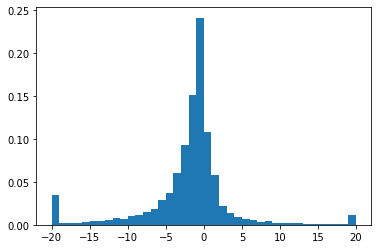

In [30]:
#avg of IRI measure 
plt.hist(np.clip(df_iri['avg_iri'], -20, 20), bins=40, density=True)

(array([0.05533811, 0.00330309, 0.00423067, 0.00398181, 0.00493202,
        0.00506776, 0.00669668, 0.00692292, 0.00925318, 0.00902695,
        0.01074636, 0.01178706, 0.0141852 , 0.01823488, 0.02656049,
        0.02936585, 0.04332481, 0.06273614, 0.10214701, 0.19318567,
        0.09244135, 0.08540531, 0.03635664, 0.02339314, 0.01893622,
        0.0146603 , 0.01239791, 0.00893645, 0.00757901, 0.00703604,
        0.00667406, 0.00540712, 0.00531662, 0.00429855, 0.00294111,
        0.00285061, 0.00316735, 0.00294111, 0.00228502, 0.03594941]),
 array([-20., -19., -18., -17., -16., -15., -14., -13., -12., -11., -10.,
         -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,   1.,
          2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.,  12.,
         13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.], dtype=float32),
 <a list of 40 Patch objects>)

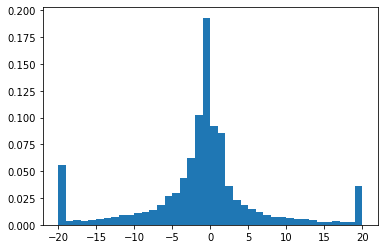

In [31]:
#df_iri_11=df_correction[df_correction['ST_CHANGE_TYPE_CD' == 11]] #.groupby(['store_id','art_no'], as_index=False).agg(avg_iri=('sc_colli', 'mean'))
df_iri_11=df_correction[df_correction['st_change_type_cd']==11].groupby(['store_id','art_no'], as_index=False).agg(avg_iri_11=('sc_colli', 'mean'),count_iri_11=('date_of_day', 'count'))
#avg of IRI measure type 11 
plt.hist(np.clip(df_iri_11['avg_iri_11'], -20, 20), bins=40, density=True)

(array([0.42120981, 0.25214957, 0.1722514 , 0.06556175, 0.03615065,
        0.02305259, 0.01531282, 0.01012123, 0.00676336, 0.00550119,
        0.00369127, 0.00297683, 0.00252435, 0.00257198, 0.00240528,
        0.00219095, 0.00183373, 0.0011431 , 0.0016194 , 0.02360032]),
 array([ 1.  ,  1.95,  2.9 ,  3.85,  4.8 ,  5.75,  6.7 ,  7.65,  8.6 ,
         9.55, 10.5 , 11.45, 12.4 , 13.35, 14.3 , 15.25, 16.2 , 17.15,
        18.1 , 19.05, 20.  ]),
 <a list of 20 Patch objects>)

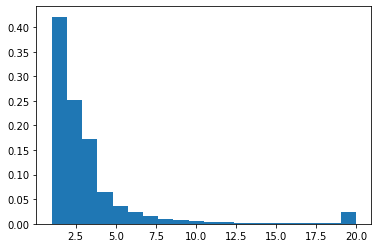

In [32]:
# how many correction of type 11 per SKU
plt.hist(np.clip(df_iri_11['count_iri_11'], 0, 20), bins=20, density=True)
# problem: 40% of skus are audited oncly once per year
# this is the IRI measure that we would like to predict

In [33]:
#y = pd.get_dummies(df_correction.st_change_type_cd, prefix='corr')
#df_correction = pd.concat([df_correction, y], axis=1)
#del y
#print(df_correction.head())
#print(df_correction.info())

## take a small sample of sale data to test

In [34]:
df_correction['cor'] = 0
df_correction.loc[df_correction['sc_colli'].notnull(), 'cor'] = 1

In [ ]:
df_correction_test= df_correction[df_correction['cor']==1]
count = df_correction_test['art_no'].value_counts()
count

In [36]:
df_correction_test_id = df_correction_test[['art_no','cor']].groupby(['art_no'])['cor'] \
                             .sum() \
                             .reset_index(name='count_cor') \
                             .sort_values(['count_cor'], ascending=False)# \
                             #.head(5)
print(df_correction_test_id)

       art_no  count_cor
28236  369501       2069
28244  369511       1908
30288  389397       1798
16865  170741       1702
18478  209204       1652
...       ...        ...
25567  334883          1
52231  541076          1
52232  541078          1
25557  334375          1
0         206          1

[63225 rows x 2 columns]


In [37]:
df_correction[df_correction['art_no']==369501]

,store_id,store_desc,art_no,art_name,mikg_art_no,mikg_art_name,tunit_no,tunit_qty,art_name0,var_no,...,art_name1,date_of_day,day_desc,st_change_type_cd,st_change_type_desc,var_tu_key,var_tu_name,sc_colli,sc_nnbp,cor
549936,10,MCC RU 10 MOW - LENINGRADSKOE SHOSSE,369501,БАНАНЫ КНОПКА 18,557198,БАНАНЫ КНОПКА 18,1,1,БАНАНЫ КНОПКА 18,1,...,БАНАНЫ КНОПКА 18,2018-10-01,01.10.18 Mon,13,Own consumption,1001,"СТАНД-АРТ, , 1.0",-6.350000,-303.237915,1
549937,10,MCC RU 10 MOW - LENINGRADSKOE SHOSSE,369501,БАНАНЫ КНОПКА 18,557198,БАНАНЫ КНОПКА 18,1,1,БАНАНЫ КНОПКА 18,1,...,БАНАНЫ КНОПКА 18,2018-10-01,01.10.18 Mon,4,Re-assignment,1001,"СТАНД-АРТ, , 1.0",-56.099998,-3324.486084,1
549938,10,MCC RU 10 MOW - LENINGRADSKOE SHOSSE,369501,БАНАНЫ КНОПКА 18,557198,БАНАНЫ КНОПКА 18,1,1,БАНАНЫ КНОПКА 18,1,...,БАНАНЫ КНОПКА 18,2018-10-01,01.10.18 Mon,1,Damage/Breakage/Debit Note,1001,"СТАНД-АРТ, , 1.0",-69.000000,-3295.025879,1
549939,10,MCC RU 10 MOW - LENINGRADSKOE SHOSSE,369501,БАНАНЫ КНОПКА 18,557198,БАНАНЫ КНОПКА 18,1,1,БАНАНЫ КНОПКА 18,1,...,БАНАНЫ КНОПКА 18,2018-10-02,02.10.18 Tue,1,Damage/Breakage/Debit Note,1001,"СТАНД-АРТ, , 1.0",-5.500000,-262.647003,1
549940,10,MCC RU 10 MOW - LENINGRADSKOE SHOSSE,369501,БАНАНЫ КНОПКА 18,557198,БАНАНЫ КНОПКА 18,1,1,БАНАНЫ КНОПКА 18,1,...,БАНАНЫ КНОПКА 18,2018-10-03,03.10.18 Wed,13,Own consumption,1001,"СТАНД-АРТ, , 1.0",-6.040000,-288.434204,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
552000,10,MCC RU 10 MOW - LENINGRADSKOE SHOSSE,369501,БАНАНЫ КНОПКА 18,557198,БАНАНЫ КНОПКА 18,1,1,БАНАНЫ КНОПКА 18,1,...,БАНАНЫ КНОПКА 18,2021-09-26,26.09.21 Sun,4,Re-assignment,1001,"СТАНД-АРТ, , 1.0",-43.799999,-2496.600098,1
552001,10,MCC RU 10 MOW - LENINGRADSKOE SHOSSE,369501,БАНАНЫ КНОПКА 18,557198,БАНАНЫ КНОПКА 18,1,1,БАНАНЫ КНОПКА 18,1,...,БАНАНЫ КНОПКА 18,2021-09-27,27.09.21 Mon,4,Re-assignment,1001,"СТАНД-АРТ, , 1.0",526.700012,39502.500000,1
552002,10,MCC RU 10 MOW - LENINGRADSKOE SHOSSE,369501,БАНАНЫ КНОПКА 18,557198,БАНАНЫ КНОПКА 18,1,1,БАНАНЫ КНОПКА 18,1,...,БАНАНЫ КНОПКА 18,2021-09-28,28.09.21 Tue,4,Re-assignment,1001,"СТАНД-АРТ, , 1.0",447.200012,22938.000000,1
552003,10,MCC RU 10 MOW - LENINGRADSKOE SHOSSE,369501,БАНАНЫ КНОПКА 18,557198,БАНАНЫ КНОПКА 18,1,1,БАНАНЫ КНОПКА 18,1,...,БАНАНЫ КНОПКА 18,2021-09-29,29.09.21 Wed,4,Re-assignment,1001,"СТАНД-АРТ, , 1.0",-23.000000,-1311.000000,1


In [38]:
#Test id  article when have more than 100 corrections
id=df_correction_test_id[df_correction_test_id['count_cor']>100]
id

,art_no,count_cor
28236,369501,2069
28244,369511,1908
30288,389397,1798
16865,170741,1702
18478,209204,1652
...,...,...
37821,455634,101
61264,560809,101
1482,28225,101
799,17181,101


In [ ]:
list_id=id['art_no']
list_id

In [40]:
list_id.dtypes

dtype('int64')

In [41]:
#list_art=[]
#for id in list_id:
 # list_art.append(id)

In [42]:
df_correction_test=df_correction[df_correction['art_no'].isin(list_id)]

In [43]:
df_correction_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 512476 entries, 946 to 1066370
Data columns (total 21 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   store_id             512476 non-null  int8          
 1   store_desc           512476 non-null  category      
 2   art_no               512476 non-null  int32         
 3   art_name             512476 non-null  category      
 4   mikg_art_no          512476 non-null  int32         
 5   mikg_art_name        512476 non-null  category      
 6   tunit_no             512476 non-null  int16         
 7   tunit_qty            512476 non-null  int16         
 8   art_name0            512476 non-null  category      
 9   var_no               512476 non-null  int8          
 10  var_desc             512476 non-null  category      
 11  art_name1            512476 non-null  category      
 12  date_of_day          512476 non-null  datetime64[ns]
 13  day_desc   

In [44]:
df_correction_test['art_no'].value_counts()

369501    2069
369511    1908
389397    1798
170741    1702
209204    1652
          ... 
28225      101
17181      101
83747      101
148058     101
429980     101
Name: art_no, Length: 1867, dtype: int64

In [45]:
df_sales_test=df_sales[df_sales['art_no'].isin(list_id)]

In [46]:
df_sales_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 781412 entries, 41627 to 21897419
Data columns (total 15 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   store_id         781412 non-null  int8          
 1   art_no           781412 non-null  int32         
 2   mikg_art_no      781412 non-null  int32         
 3   tunit_no         781412 non-null  int16         
 4   tunit_qty        781412 non-null  int16         
 5   var_no           781412 non-null  int8          
 6   date_of_day      781412 non-null  datetime64[ns]
 7   var_tu_key       781412 non-null  int32         
 8   art_no2          781412 non-null  int32         
 9   recpt_qty_colli  92780 non-null   float32       
 10  stock_qty_colli  781408 non-null  float32       
 11  sell_qty_colli   781412 non-null  float16       
 12  sc_colli         121610 non-null  float16       
 13  replenishement   781412 non-null  int64         
 14  correction    

In [47]:
df_sales_test['art_no'].value_counts()

450757    4899
464831    4497
464843    3276
482736    2844
434942    2730
          ... 
307767     228
465546     228
99605      171
105992     128
267340      82
Name: art_no, Length: 1856, dtype: int64

In [48]:
df_sales_test_1= df_sales_test[df_sales_test['correction']==1]
count = df_sales_test_1['art_no'].value_counts()
count

93657     544
150798    531
2481      486
4183      478
2496      465
         ... 
472089      1
505072      1
433643      1
505627      1
434651      1
Name: art_no, Length: 1677, dtype: int64

In [49]:
df_sales_test_id = df_sales_test_1[['art_no','correction']].groupby(['art_no'])['correction'] \
                             .sum() \
                             .reset_index(name='count_cor') \
                             .sort_values(['count_cor'], ascending=False)# \
                             #.head(5)
print(df_sales_test_id)

      art_no  count_cor
254    93657        544
398   150798        531
3       2481        486
9       4183        478
5       2496        465
...      ...        ...
1279  472089          1
1372  505072          1
1110  433643          1
1374  505627          1
1115  434651          1

[1677 rows x 2 columns]


In [50]:
df_sales_test_id = df_sales_test[['art_no','correction']].groupby(['art_no'])['correction'] \
                             .sum() \
                             .reset_index(name='count_cor') \
                             .sort_values(['count_cor'], ascending=False)# \
                             #.head(5)
print(df_sales_test_id)

      art_no  count_cor
260    93657        544
415   150798        531
3       2481        486
9       4183        478
5       2496        465
...      ...        ...
411   149234          0
412   149250          0
413   149265          0
417   151534          0
1284  445187          0

[1856 rows x 2 columns]


In [51]:
#Test id  article in sales when have more than 100 corrections
id=df_sales_test_id[df_sales_test_id['count_cor']>100]
id

,art_no,count_cor
260,93657,544
415,150798,531
3,2481,486
9,4183,478
5,2496,465
...,...,...
1639,537189,102
195,75127,102
416,150902,102
116,38725,101


In [52]:
list_id=id['art_no']
list_id

260      93657
415     150798
3         2481
9         4183
5         2496
         ...  
1639    537189
195      75127
416     150902
116      38725
698     278094
Name: art_no, Length: 358, dtype: int64

In [53]:
df_sales_test=df_sales[df_sales['art_no'].isin(list_id)]
df_sales_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 194185 entries, 41627 to 21767275
Data columns (total 15 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   store_id         194185 non-null  int8          
 1   art_no           194185 non-null  int32         
 2   mikg_art_no      194185 non-null  int32         
 3   tunit_no         194185 non-null  int16         
 4   tunit_qty        194185 non-null  int16         
 5   var_no           194185 non-null  int8          
 6   date_of_day      194185 non-null  datetime64[ns]
 7   var_tu_key       194185 non-null  int32         
 8   art_no2          194185 non-null  int32         
 9   recpt_qty_colli  17155 non-null   float32       
 10  stock_qty_colli  194182 non-null  float32       
 11  sell_qty_colli   194185 non-null  float16       
 12  sc_colli         71234 non-null   float16       
 13  replenishement   194185 non-null  int64         
 14  correction    

In [54]:
df_correction_test=df_correction[df_correction['art_no'].isin(list_id)]
df_correction_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 214489 entries, 946 to 1063271
Data columns (total 21 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   store_id             214489 non-null  int8          
 1   store_desc           214489 non-null  category      
 2   art_no               214489 non-null  int32         
 3   art_name             214489 non-null  category      
 4   mikg_art_no          214489 non-null  int32         
 5   mikg_art_name        214489 non-null  category      
 6   tunit_no             214489 non-null  int16         
 7   tunit_qty            214489 non-null  int16         
 8   art_name0            214489 non-null  category      
 9   var_no               214489 non-null  int8          
 10  var_desc             214489 non-null  category      
 11  art_name1            214489 non-null  category      
 12  date_of_day          214489 non-null  datetime64[ns]
 13  day_desc   

In [55]:
df_correction_test['art_no'].value_counts()

369501    2069
369511    1908
389397    1798
170741    1702
209204    1652
          ... 
101842     127
387736     123
98428      123
155803     113
99295      109
Name: art_no, Length: 358, dtype: int64

In [56]:
df_sales_test['art_no'].value_counts()

434942    2730
90494     1839
489292    1668
465732    1638
461844    1638
          ... 
387736     251
93100      249
99604      242
99605      171
105992     128
Name: art_no, Length: 358, dtype: int64

In [57]:
df_sales_test[df_sales_test['art_no']==434942]

,store_id,art_no,mikg_art_no,tunit_no,tunit_qty,var_no,date_of_day,var_tu_key,art_no2,recpt_qty_colli,stock_qty_colli,sell_qty_colli,sc_colli,replenishement,correction
11924566,10,434942,617826,1,1,6,2021-01-01,6001,434942,NaN,35.0,0.0,NaN,0,0
11924567,10,434942,589504,1,1,5,2021-01-01,5001,434942,NaN,198.0,0.0,NaN,0,0
11924568,10,434942,617827,1,1,7,2021-01-01,7001,434942,NaN,13.0,0.0,NaN,0,0
11924569,10,434942,617828,1,1,8,2021-01-01,8001,434942,NaN,126.0,0.0,NaN,0,0
11924570,10,434942,617829,1,1,9,2021-01-01,9001,434942,NaN,114.0,0.0,NaN,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11927291,10,434942,617829,1,1,9,2021-09-30,9001,434942,NaN,170.0,0.0,NaN,0,0
11927292,10,434942,589497,1,1,1,2021-09-30,1001,434942,NaN,394.0,72.0,NaN,0,0
11927293,10,434942,589503,1,1,4,2021-09-30,4001,434942,NaN,230.0,48.0,NaN,0,0
11927294,10,434942,617830,1,1,10,2021-09-30,10001,434942,NaN,95.0,72.0,NaN,0,0


In [58]:
#Restrict with correction = 1

df_correction_test_1=df_correction_test[df_correction_test['cor']==1]
df_sales_test_1=df_sales_test[df_sales_test['correction']==1]
print(df_correction_test_1.info())
print(df_sales_test_1.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 214489 entries, 946 to 1063271
Data columns (total 21 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   store_id             214489 non-null  int8          
 1   store_desc           214489 non-null  category      
 2   art_no               214489 non-null  int32         
 3   art_name             214489 non-null  category      
 4   mikg_art_no          214489 non-null  int32         
 5   mikg_art_name        214489 non-null  category      
 6   tunit_no             214489 non-null  int16         
 7   tunit_qty            214489 non-null  int16         
 8   art_name0            214489 non-null  category      
 9   var_no               214489 non-null  int8          
 10  var_desc             214489 non-null  category      
 11  art_name1            214489 non-null  category      
 12  date_of_day          214489 non-null  datetime64[ns]
 13  day_desc   

In [59]:
#Take an id of product for testing the prediction

#If the id is not in list, thus return cannot predict!

In [60]:
df_correction_test_2=df_correction_test_1[df_correction_test_1['art_no']==93657]
df_sales_test_2=df_sales_test_1[df_sales_test_1['art_no']==93657]
print(df_correction_test_2.info())
print(df_sales_test_2.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1556 entries, 154587 to 156142
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   store_id             1556 non-null   int8          
 1   store_desc           1556 non-null   category      
 2   art_no               1556 non-null   int32         
 3   art_name             1556 non-null   category      
 4   mikg_art_no          1556 non-null   int32         
 5   mikg_art_name        1556 non-null   category      
 6   tunit_no             1556 non-null   int16         
 7   tunit_qty            1556 non-null   int16         
 8   art_name0            1556 non-null   category      
 9   var_no               1556 non-null   int8          
 10  var_desc             1556 non-null   category      
 11  art_name1            1556 non-null   category      
 12  date_of_day          1556 non-null   datetime64[ns]
 13  day_desc             1556 

In [61]:
df_correction_test_2.head()

,store_id,store_desc,art_no,art_name,mikg_art_no,mikg_art_name,tunit_no,tunit_qty,art_name0,var_no,...,art_name1,date_of_day,day_desc,st_change_type_cd,st_change_type_desc,var_tu_key,var_tu_name,sc_colli,sc_nnbp,cor
154587,10,MCC RU 10 MOW - LENINGRADSKOE SHOSSE,93657,БУМАГА A4 80Г/М2 С SVETOCOPY,347599,БУМАГА A4 80Г/М2 С SVETOCOPY,3,1,БУМАГА A4 80Г/М2 С SVETOCOPY,1,...,БУМАГА A4 80Г/М2 С SVETOCOPY,2018-10-22,22.10.18 Mon,4,Re-assignment,1003,"STAND-ART, , 1.0",-2095.0,-362780.687500,1
154588,10,MCC RU 10 MOW - LENINGRADSKOE SHOSSE,93657,БУМАГА A4 80Г/М2 С SVETOCOPY,93657,БУМАГА A4 80Г/М2 С SVETOCOPY,1,5,БУМАГА A4 80Г/М2 С SVETOCOPY,1,...,БУМАГА A4 80Г/М2 С SVETOCOPY,2018-10-22,22.10.18 Mon,4,Re-assignment,1001,"STAND-ART, , 5.0",419.0,362780.687500,1
154589,10,MCC RU 10 MOW - LENINGRADSKOE SHOSSE,93657,БУМАГА A4 80Г/М2 С SVETOCOPY,347599,БУМАГА A4 80Г/М2 С SVETOCOPY,3,1,БУМАГА A4 80Г/М2 С SVETOCOPY,1,...,БУМАГА A4 80Г/М2 С SVETOCOPY,2018-10-27,27.10.18 Sat,4,Re-assignment,1003,"STAND-ART, , 1.0",-820.0,-141995.296875,1
154590,10,MCC RU 10 MOW - LENINGRADSKOE SHOSSE,93657,БУМАГА A4 80Г/М2 С SVETOCOPY,93657,БУМАГА A4 80Г/М2 С SVETOCOPY,1,5,БУМАГА A4 80Г/М2 С SVETOCOPY,1,...,БУМАГА A4 80Г/М2 С SVETOCOPY,2018-10-27,27.10.18 Sat,4,Re-assignment,1001,"STAND-ART, , 5.0",164.0,141995.296875,1
154591,10,MCC RU 10 MOW - LENINGRADSKOE SHOSSE,93657,БУМАГА A4 80Г/М2 С SVETOCOPY,347599,БУМАГА A4 80Г/М2 С SVETOCOPY,3,1,БУМАГА A4 80Г/М2 С SVETOCOPY,1,...,БУМАГА A4 80Г/М2 С SVETOCOPY,2018-11-06,06.11.18 Tue,4,Re-assignment,1003,"STAND-ART, , 1.0",-1000.0,-180100.000000,1


In [62]:
df_sales_test_2.head()

,store_id,art_no,mikg_art_no,tunit_no,tunit_qty,var_no,date_of_day,var_tu_key,art_no2,recpt_qty_colli,stock_qty_colli,sell_qty_colli,sc_colli,replenishement,correction
4078232,10,93657,93657,1,5,1,2021-01-01,1001,93657,NaN,0.0,2.0,2.0,0,1
4078233,10,93657,347599,3,1,1,2021-01-01,1003,93657,NaN,3301.0,3.0,-10.0,0,1
4078234,10,93657,93657,1,5,1,2021-01-02,1001,93657,NaN,0.0,1.0,1.0,0,1
4078235,10,93657,347599,3,1,1,2021-01-02,1003,93657,NaN,3289.0,7.0,-5.0,0,1
4078236,10,93657,93657,1,5,1,2021-01-03,1001,93657,NaN,0.0,2.0,2.0,0,1


In [63]:
#Merge data

In [64]:
df1 = pd.merge(df_sales_test_2, df_correction_test_2[['store_id','art_no', 'mikg_art_no', 'tunit_no', 'tunit_qty', 'var_no',	'date_of_day', 'var_tu_key','sc_colli','st_change_type_cd', 'sc_nnbp'	
                                   ]], on=['store_id','art_no', 'mikg_art_no', 'tunit_no', 'tunit_qty', 'var_no',	'date_of_day', 'var_tu_key','sc_colli' ], how='left')
df1.info()
#'store_id','art_no', 'mikg_art_no', 'tunit_no', 'tunit_qty', 'var_no',	'date_of_day', 'var_tu_key','sc_colli'

<class 'pandas.core.frame.DataFrame'>
Int64Index: 544 entries, 0 to 543
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   store_id           544 non-null    int8          
 1   art_no             544 non-null    int32         
 2   mikg_art_no        544 non-null    int32         
 3   tunit_no           544 non-null    int16         
 4   tunit_qty          544 non-null    int16         
 5   var_no             544 non-null    int8          
 6   date_of_day        544 non-null    datetime64[ns]
 7   var_tu_key         544 non-null    int32         
 8   art_no2            544 non-null    int32         
 9   recpt_qty_colli    24 non-null     float32       
 10  stock_qty_colli    544 non-null    float32       
 11  sell_qty_colli     544 non-null    float16       
 12  sc_colli           544 non-null    float16       
 13  replenishement     544 non-null    int64         
 14  correction

In [65]:
df1.head()

,store_id,art_no,mikg_art_no,tunit_no,tunit_qty,var_no,date_of_day,var_tu_key,art_no2,recpt_qty_colli,stock_qty_colli,sell_qty_colli,sc_colli,replenishement,correction,st_change_type_cd,sc_nnbp
0,10,93657,93657,1,5,1,2021-01-01,1001,93657,NaN,0.0,2.0,2.0,0,1,4.0,1920.0
1,10,93657,347599,3,1,1,2021-01-01,1003,93657,NaN,3301.0,3.0,-10.0,0,1,4.0,-1920.0
2,10,93657,93657,1,5,1,2021-01-02,1001,93657,NaN,0.0,1.0,1.0,0,1,4.0,960.0
3,10,93657,347599,3,1,1,2021-01-02,1003,93657,NaN,3289.0,7.0,-5.0,0,1,4.0,-960.0
4,10,93657,93657,1,5,1,2021-01-03,1001,93657,NaN,0.0,2.0,2.0,0,1,4.0,1920.0


In [66]:
#Test with whole data correction
cond1 = df_sales_test_2['art_no']==93657 
cond2 = df_sales_test_2['date_of_day']==datetime.datetime(2021, 1, 1)
df_sales_test_2[cond1 & cond2]

,store_id,art_no,mikg_art_no,tunit_no,tunit_qty,var_no,date_of_day,var_tu_key,art_no2,recpt_qty_colli,stock_qty_colli,sell_qty_colli,sc_colli,replenishement,correction
4078232,10,93657,93657,1,5,1,2021-01-01,1001,93657,NaN,0.0,2.0,2.0,0,1
4078233,10,93657,347599,3,1,1,2021-01-01,1003,93657,NaN,3301.0,3.0,-10.0,0,1


In [67]:
#Test with whole data correction
cond1 = df_correction_test_2['art_no']==93657 
cond2 = df_correction_test_2['date_of_day']==datetime.datetime(2021, 1, 1)
df_correction_test_2[cond1 & cond2]

,store_id,store_desc,art_no,art_name,mikg_art_no,mikg_art_name,tunit_no,tunit_qty,art_name0,var_no,...,art_name1,date_of_day,day_desc,st_change_type_cd,st_change_type_desc,var_tu_key,var_tu_name,sc_colli,sc_nnbp,cor
155583,10,MCC RU 10 MOW - LENINGRADSKOE SHOSSE,93657,БУМАГА A4 80Г/М2 С SVETOCOPY,93657,БУМАГА A4 80Г/М2 С SVETOCOPY,1,5,БУМАГА A4 80Г/М2 С SVETOCOPY,1,...,БУМАГА A4 80Г/М2 С SVETOCOPY,2021-01-01,01.01.21 Fri,4,Re-assignment,1001,"STAND-ART, , 5.0",2.0,1920.0,1
155584,10,MCC RU 10 MOW - LENINGRADSKOE SHOSSE,93657,БУМАГА A4 80Г/М2 С SVETOCOPY,347599,БУМАГА A4 80Г/М2 С SVETOCOPY,3,1,БУМАГА A4 80Г/М2 С SVETOCOPY,1,...,БУМАГА A4 80Г/М2 С SVETOCOPY,2021-01-01,01.01.21 Fri,4,Re-assignment,1003,"STAND-ART, , 1.0",-10.0,-1920.0,1


In [68]:
# fill recpt_qty_colli nan by 0
df1=pd.DataFrame(df1)
df1


,store_id,art_no,mikg_art_no,tunit_no,tunit_qty,var_no,date_of_day,var_tu_key,art_no2,recpt_qty_colli,stock_qty_colli,sell_qty_colli,sc_colli,replenishement,correction,st_change_type_cd,sc_nnbp
0,10,93657,93657,1,5,1,2021-01-01,1001,93657,NaN,0.0,2.0,2.0,0,1,4.0,1920.0
1,10,93657,347599,3,1,1,2021-01-01,1003,93657,NaN,3301.0,3.0,-10.0,0,1,4.0,-1920.0
2,10,93657,93657,1,5,1,2021-01-02,1001,93657,NaN,0.0,1.0,1.0,0,1,4.0,960.0
3,10,93657,347599,3,1,1,2021-01-02,1003,93657,NaN,3289.0,7.0,-5.0,0,1,4.0,-960.0
4,10,93657,93657,1,5,1,2021-01-03,1001,93657,NaN,0.0,2.0,2.0,0,1,4.0,1920.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
539,10,93657,93657,1,5,1,2021-09-28,1001,93657,NaN,0.0,4.0,4.0,0,1,4.0,4040.0
540,10,93657,347599,3,1,1,2021-09-29,1003,93657,NaN,3769.0,25.0,-30.0,0,1,4.0,-6060.0
541,10,93657,93657,1,5,1,2021-09-29,1001,93657,NaN,0.0,6.0,6.0,0,1,4.0,6060.0
542,10,93657,347599,3,1,1,2021-09-30,1003,93657,480.0,4194.0,20.0,-35.0,1,1,4.0,-7070.0


In [69]:
df2=df1.replace(np.nan, 0)
df2

,store_id,art_no,mikg_art_no,tunit_no,tunit_qty,var_no,date_of_day,var_tu_key,art_no2,recpt_qty_colli,stock_qty_colli,sell_qty_colli,sc_colli,replenishement,correction,st_change_type_cd,sc_nnbp
0,10,93657,93657,1,5,1,2021-01-01,1001,93657,0.0,0.0,2.0,2.0,0,1,4.0,1920.0
1,10,93657,347599,3,1,1,2021-01-01,1003,93657,0.0,3301.0,3.0,-10.0,0,1,4.0,-1920.0
2,10,93657,93657,1,5,1,2021-01-02,1001,93657,0.0,0.0,1.0,1.0,0,1,4.0,960.0
3,10,93657,347599,3,1,1,2021-01-02,1003,93657,0.0,3289.0,7.0,-5.0,0,1,4.0,-960.0
4,10,93657,93657,1,5,1,2021-01-03,1001,93657,0.0,0.0,2.0,2.0,0,1,4.0,1920.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
539,10,93657,93657,1,5,1,2021-09-28,1001,93657,0.0,0.0,4.0,4.0,0,1,4.0,4040.0
540,10,93657,347599,3,1,1,2021-09-29,1003,93657,0.0,3769.0,25.0,-30.0,0,1,4.0,-6060.0
541,10,93657,93657,1,5,1,2021-09-29,1001,93657,0.0,0.0,6.0,6.0,0,1,4.0,6060.0
542,10,93657,347599,3,1,1,2021-09-30,1003,93657,480.0,4194.0,20.0,-35.0,1,1,4.0,-7070.0


In [70]:
df2.describe()

,store_id,art_no,mikg_art_no,tunit_no,tunit_qty,var_no,var_tu_key,art_no2,recpt_qty_colli,stock_qty_colli,sell_qty_colli,sc_colli,replenishement,correction,st_change_type_cd,sc_nnbp
count,544.0,544.0,544.000000,544.00000,544.000000,544.0,544.00000,544.0,544.000000,544.000000,544.00000,544.000000,544.000000,544.0,544.000000,544.000000
mean,10.0,93657.0,220628.000000,2.00000,3.000000,1.0,1002.00000,93657.0,34.411766,1958.260986,16.46875,-16.296875,0.044118,1.0,3.882353,162.898697
std,0.0,0.0,127087.862427,1.00092,2.001841,0.0,1.00092,0.0,191.805161,2015.819702,inf,31.718750,0.205545,0.0,0.676453,9577.924805
min,10.0,93657.0,93657.000000,1.00000,1.000000,1.0,1001.00000,93657.0,0.000000,0.000000,-8.00000,-175.000000,0.000000,1.0,0.000000,-34590.500000
25%,10.0,93657.0,93657.000000,1.00000,1.000000,1.0,1001.00000,93657.0,0.000000,0.000000,6.00000,-35.000000,0.000000,1.0,4.000000,-6720.000000
50%,10.0,93657.0,220628.000000,2.00000,3.000000,1.0,1002.00000,93657.0,0.000000,1075.500000,12.00000,-0.500000,0.000000,1.0,4.000000,480.000000
75%,10.0,93657.0,347599.000000,3.00000,5.000000,1.0,1003.00000,93657.0,0.000000,3907.750000,21.00000,7.000000,0.000000,1.0,4.000000,6918.100098
max,10.0,93657.0,347599.000000,3.00000,5.000000,1.0,1003.00000,93657.0,2400.000000,5326.000000,283.00000,35.000000,1.000000,1.0,4.000000,34590.500000


In [71]:
df2.columns

Index(['store_id', 'art_no', 'mikg_art_no', 'tunit_no', 'tunit_qty', 'var_no',
       'date_of_day', 'var_tu_key', 'art_no2', 'recpt_qty_colli',
       'stock_qty_colli', 'sell_qty_colli', 'sc_colli', 'replenishement',
       'correction', 'st_change_type_cd', 'sc_nnbp'],
      dtype='object')

In [72]:
df2['day_of_year']=df2['date_of_day'].dt.dayofyear
df2['day_of_month']=df2['date_of_day'].dt.day
df2['day_of_week']=df2['date_of_day'].dt.dayofweek
#df["Is Weekend"] = dates.dt.dayofweek > 4

df2['week_of_year']=df2['date_of_day'].dt.week

df2['month']=df2['date_of_day'].dt.month
df2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  


,store_id,art_no,mikg_art_no,tunit_no,tunit_qty,var_no,date_of_day,var_tu_key,art_no2,recpt_qty_colli,...,sc_colli,replenishement,correction,st_change_type_cd,sc_nnbp,day_of_year,day_of_month,day_of_week,week_of_year,month
0,10,93657,93657,1,5,1,2021-01-01,1001,93657,0.0,...,2.0,0,1,4.0,1920.0,1,1,4,53,1
1,10,93657,347599,3,1,1,2021-01-01,1003,93657,0.0,...,-10.0,0,1,4.0,-1920.0,1,1,4,53,1
2,10,93657,93657,1,5,1,2021-01-02,1001,93657,0.0,...,1.0,0,1,4.0,960.0,2,2,5,53,1
3,10,93657,347599,3,1,1,2021-01-02,1003,93657,0.0,...,-5.0,0,1,4.0,-960.0,2,2,5,53,1
4,10,93657,93657,1,5,1,2021-01-03,1001,93657,0.0,...,2.0,0,1,4.0,1920.0,3,3,6,53,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
539,10,93657,93657,1,5,1,2021-09-28,1001,93657,0.0,...,4.0,0,1,4.0,4040.0,271,28,1,39,9
540,10,93657,347599,3,1,1,2021-09-29,1003,93657,0.0,...,-30.0,0,1,4.0,-6060.0,272,29,2,39,9
541,10,93657,93657,1,5,1,2021-09-29,1001,93657,0.0,...,6.0,0,1,4.0,6060.0,272,29,2,39,9
542,10,93657,347599,3,1,1,2021-09-30,1003,93657,480.0,...,-35.0,1,1,4.0,-7070.0,273,30,3,39,9


In [73]:
df3=df2[df2['replenishement']==1]
df3

,store_id,art_no,mikg_art_no,tunit_no,tunit_qty,var_no,date_of_day,var_tu_key,art_no2,recpt_qty_colli,...,sc_colli,replenishement,correction,st_change_type_cd,sc_nnbp,day_of_year,day_of_month,day_of_week,week_of_year,month
39,10,93657,347599,3,1,1,2021-01-20,1003,93657,480.0,...,-55.0,1,1,4.0,-10560.000000,20,20,2,3,1
41,10,93657,347599,3,1,1,2021-01-21,1003,93657,1440.0,...,-55.0,1,1,4.0,-10560.000000,21,21,3,3,1
52,10,93657,347599,3,1,1,2021-01-27,1003,93657,720.0,...,-65.0,1,1,4.0,-12480.000000,27,27,2,4,1
54,10,93657,347599,3,1,1,2021-01-28,1003,93657,480.0,...,-50.0,1,1,4.0,-9600.000000,28,28,3,4,1
56,10,93657,347599,3,1,1,2021-01-29,1003,93657,240.0,...,-115.0,1,1,4.0,-22080.000000,29,29,4,4,1
97,10,93657,347599,3,1,1,2021-02-18,1003,93657,2400.0,...,-30.0,1,1,4.0,-5760.000000,49,18,3,7,2
124,10,93657,347599,3,1,1,2021-03-04,1003,93657,1200.0,...,-45.0,1,1,4.0,-8640.000000,63,4,3,9,3
198,10,93657,347599,3,1,1,2021-04-10,1003,93657,1440.0,...,-25.0,1,1,4.0,-4941.500000,100,10,5,14,4
200,10,93657,347599,3,1,1,2021-04-11,1003,93657,960.0,...,-15.0,1,1,4.0,-2964.899902,101,11,6,14,4
255,10,93657,347599,3,1,1,2021-05-08,1003,93657,960.0,...,-60.0,1,1,4.0,-11859.599609,128,8,5,18,5


In [74]:
df3['last_replenishment'] = pd.to_datetime(df3['date_of_day'].astype(str)).diff(1).dt.days
df3

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,store_id,art_no,mikg_art_no,tunit_no,tunit_qty,var_no,date_of_day,var_tu_key,art_no2,recpt_qty_colli,...,replenishement,correction,st_change_type_cd,sc_nnbp,day_of_year,day_of_month,day_of_week,week_of_year,month,last_replenishment
39,10,93657,347599,3,1,1,2021-01-20,1003,93657,480.0,...,1,1,4.0,-10560.000000,20,20,2,3,1,NaN
41,10,93657,347599,3,1,1,2021-01-21,1003,93657,1440.0,...,1,1,4.0,-10560.000000,21,21,3,3,1,1.0
52,10,93657,347599,3,1,1,2021-01-27,1003,93657,720.0,...,1,1,4.0,-12480.000000,27,27,2,4,1,6.0
54,10,93657,347599,3,1,1,2021-01-28,1003,93657,480.0,...,1,1,4.0,-9600.000000,28,28,3,4,1,1.0
56,10,93657,347599,3,1,1,2021-01-29,1003,93657,240.0,...,1,1,4.0,-22080.000000,29,29,4,4,1,1.0
97,10,93657,347599,3,1,1,2021-02-18,1003,93657,2400.0,...,1,1,4.0,-5760.000000,49,18,3,7,2,20.0
124,10,93657,347599,3,1,1,2021-03-04,1003,93657,1200.0,...,1,1,4.0,-8640.000000,63,4,3,9,3,14.0
198,10,93657,347599,3,1,1,2021-04-10,1003,93657,1440.0,...,1,1,4.0,-4941.500000,100,10,5,14,4,37.0
200,10,93657,347599,3,1,1,2021-04-11,1003,93657,960.0,...,1,1,4.0,-2964.899902,101,11,6,14,4,1.0
255,10,93657,347599,3,1,1,2021-05-08,1003,93657,960.0,...,1,1,4.0,-11859.599609,128,8,5,18,5,27.0


In [75]:
df4 = pd.merge(df2, df3[['store_id','art_no','date_of_day','last_replenishment']], on=['store_id','art_no','date_of_day'], how='left') 
#adding for each replenishment operation the last time the stock was replensihed
df4.tail()

,store_id,art_no,mikg_art_no,tunit_no,tunit_qty,var_no,date_of_day,var_tu_key,art_no2,recpt_qty_colli,...,replenishement,correction,st_change_type_cd,sc_nnbp,day_of_year,day_of_month,day_of_week,week_of_year,month,last_replenishment
539,10,93657,93657,1,5,1,2021-09-28,1001,93657,0.0,...,0,1,4.0,4040.0,271,28,1,39,9,NaN
540,10,93657,347599,3,1,1,2021-09-29,1003,93657,0.0,...,0,1,4.0,-6060.0,272,29,2,39,9,NaN
541,10,93657,93657,1,5,1,2021-09-29,1001,93657,0.0,...,0,1,4.0,6060.0,272,29,2,39,9,NaN
542,10,93657,347599,3,1,1,2021-09-30,1003,93657,480.0,...,1,1,4.0,-7070.0,273,30,3,39,9,7.0
543,10,93657,93657,1,5,1,2021-09-30,1001,93657,0.0,...,0,1,4.0,7070.0,273,30,3,39,9,7.0


In [ ]:
df4.columns

In [76]:
df5=df4[['sc_colli', 'mikg_art_no', 'tunit_no', 'tunit_qty', 
       'var_tu_key', 'recpt_qty_colli',
       'stock_qty_colli', 'sell_qty_colli', 'replenishement',
       'correction', 'st_change_type_cd', 'sc_nnbp', 'day_of_year',
       'day_of_month', 'day_of_week', 'week_of_year', 'month']]

In [77]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 544 entries, 0 to 543
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sc_colli           544 non-null    float16
 1   mikg_art_no        544 non-null    int32  
 2   tunit_no           544 non-null    int16  
 3   tunit_qty          544 non-null    int16  
 4   var_tu_key         544 non-null    int32  
 5   recpt_qty_colli    544 non-null    float32
 6   stock_qty_colli    544 non-null    float32
 7   sell_qty_colli     544 non-null    float16
 8   replenishement     544 non-null    int64  
 9   correction         544 non-null    int64  
 10  st_change_type_cd  544 non-null    float64
 11  sc_nnbp            544 non-null    float32
 12  day_of_year        544 non-null    int64  
 13  day_of_month       544 non-null    int64  
 14  day_of_week        544 non-null    int64  
 15  week_of_year       544 non-null    int64  
 16  month              544 non

In [ ]:
#Predict  last column value

In [78]:
df5['mikg_art_no'].astype(object)
df5['st_change_type_cd'].astype(object)

0      4.0
1      4.0
2      4.0
3      4.0
4      4.0
      ... 
539    4.0
540    4.0
541    4.0
542    4.0
543    4.0
Name: st_change_type_cd, Length: 544, dtype: object

In [79]:
df5.head()

,sc_colli,mikg_art_no,tunit_no,tunit_qty,var_tu_key,recpt_qty_colli,stock_qty_colli,sell_qty_colli,replenishement,correction,st_change_type_cd,sc_nnbp,day_of_year,day_of_month,day_of_week,week_of_year,month
0,2.0,93657,1,5,1001,0.0,0.0,2.0,0,1,4.0,1920.0,1,1,4,53,1
1,-10.0,347599,3,1,1003,0.0,3301.0,3.0,0,1,4.0,-1920.0,1,1,4,53,1
2,1.0,93657,1,5,1001,0.0,0.0,1.0,0,1,4.0,960.0,2,2,5,53,1
3,-5.0,347599,3,1,1003,0.0,3289.0,7.0,0,1,4.0,-960.0,2,2,5,53,1
4,2.0,93657,1,5,1001,0.0,0.0,2.0,0,1,4.0,1920.0,3,3,6,53,1


In [ ]:
#https://www.kaggle.com/code/danavg/abc-analysis-of-active-inventory/notebook

In [ ]:
#y = pd.get_dummies(df_correction.st_change_type_cd, prefix='corr')
#df_correction = pd.concat([df_correction, y], axis=1)
#del y
#print(df_correction.head())
#print(df_correction.info())

In [80]:
dummy_variables = ['mikg_art_no','tunit_no','var_tu_key','st_change_type_cd','day_of_year','day_of_month',
                'day_of_week','week_of_year','month']

for var in dummy_variables:
    dummy = pd.get_dummies(df5[var], prefix = var, drop_first = False)
    df5 = pd.concat([df5, dummy], axis = 1)

df5 = df5.drop(dummy_variables, axis = 1)
df5

,sc_colli,tunit_qty,recpt_qty_colli,stock_qty_colli,sell_qty_colli,replenishement,correction,sc_nnbp,mikg_art_no_93657,mikg_art_no_347599,...,week_of_year_53,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9
0,2.0,5,0.0,0.0,2.0,0,1,1920.0,1,0,...,1,1,0,0,0,0,0,0,0,0
1,-10.0,1,0.0,3301.0,3.0,0,1,-1920.0,0,1,...,1,1,0,0,0,0,0,0,0,0
2,1.0,5,0.0,0.0,1.0,0,1,960.0,1,0,...,1,1,0,0,0,0,0,0,0,0
3,-5.0,1,0.0,3289.0,7.0,0,1,-960.0,0,1,...,1,1,0,0,0,0,0,0,0,0
4,2.0,5,0.0,0.0,2.0,0,1,1920.0,1,0,...,1,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
539,4.0,5,0.0,0.0,4.0,0,1,4040.0,1,0,...,0,0,0,0,0,0,0,0,0,1
540,-30.0,1,0.0,3769.0,25.0,0,1,-6060.0,0,1,...,0,0,0,0,0,0,0,0,0,1
541,6.0,5,0.0,0.0,6.0,0,1,6060.0,1,0,...,0,0,0,0,0,0,0,0,0,1
542,-35.0,1,480.0,4194.0,20.0,1,1,-7070.0,0,1,...,0,0,0,0,0,0,0,0,0,1


4. Scale variables
We can scale the variables so they are normalized with 0 mean and with a standard deviation equal to 1.

In [81]:
#Re-scale
#We keep this value to re-scale the predicted unit_sales values in the following lines of code.
min_train, max_train = df5['sc_colli'].min(), df5['sc_colli'].max()

In [82]:
scalable_variables = ['sc_colli','recpt_qty_colli','stock_qty_colli', 'sell_qty_colli', 'sc_nnbp']

for var in scalable_variables:
    mini, maxi = df5[var].min(), df5[var].max()
    df5.loc[:,var] = (df5[var] - mini) / (maxi - mini)

In [83]:
print('Shape : ', df5.shape)
df5.sample(10)

Shape :  (544, 375)


,sc_colli,tunit_qty,recpt_qty_colli,stock_qty_colli,sell_qty_colli,replenishement,correction,sc_nnbp,mikg_art_no_93657,mikg_art_no_347599,...,week_of_year_53,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9
249,0.738281,1,0.0,0.589185,0.120300,0,1,0.442857,0,1,...,0,0,0,0,0,1,0,0,0,0
505,0.852539,5,0.0,0.000000,0.041229,0,1,0.558398,1,0,...,0,0,0,0,0,0,0,0,0,1
450,0.785645,1,0.0,0.813932,0.054993,0,1,0.470801,0,1,...,0,0,0,0,0,0,0,0,1,0
91,0.357178,1,0.0,0.566091,0.092773,0,1,0.222467,0,1,...,0,0,1,0,0,0,0,0,0,0
408,0.714355,1,0.0,0.876455,0.048096,0,1,0.427003,0,1,...,0,0,0,0,0,0,0,1,0,0
341,0.837891,5,0.0,0.000000,0.030930,0,1,0.514286,1,0,...,0,0,0,0,0,0,1,0,0,0
511,0.852539,5,0.0,0.000000,0.041229,0,1,0.558398,1,0,...,0,0,0,0,0,0,0,0,0,1
413,0.856934,5,0.0,0.000000,0.044678,0,1,0.572997,1,0,...,0,0,0,0,0,0,0,1,0,0
400,0.643066,1,0.0,0.641382,0.065308,0,1,0.383205,0,1,...,0,0,0,0,0,0,0,1,0,0
261,0.619141,1,0.1,0.754225,0.182129,1,1,0.371429,0,1,...,0,0,0,0,0,1,0,0,0,0


Split the data into a train and a validation database

In [84]:
#train database without sc_colli
df5 = df5.reset_index(drop=True)  #we reset the index
y_labels = df5['sc_colli']
X_df5 = df5.drop(['sc_colli'], axis = 1)

print('Shape X :', X_df5.shape)
print('Shape y :', y_labels.shape)

Shape X : (544, 374)
Shape y : (544,)


In [85]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import itemfreq
import seaborn as sns
from sklearn.model_selection import train_test_split
%matplotlib inline

import datetime
from datetime import date, timedelta

In [101]:
num_test = 0.05
X_train, X_validation, y_train, y_validation = train_test_split(X_df5, y_labels, test_size=num_test, shuffle = False)
print('X_train shape :', X_train.shape)
print('y_train shape :', y_train.shape)
print('X_validation shape :', X_validation.shape)
print('y_validation shape :', y_validation.shape)

X_train shape : (516, 374)
y_train shape : (516,)
X_validation shape : (28, 374)
y_validation shape : (28,)


In [102]:
y_validation

516    0.619141
517    0.875977
518    0.809570
519    0.837891
520    0.771484
521    0.842773
522    0.690430
523    0.861816
524    0.643066
525    0.871582
526    0.809570
527    0.837891
528    0.761719
529    0.847656
530    0.643066
531    0.871582
532    0.738281
533    0.852539
534    0.757324
535    0.847656
536    0.666504
537    0.866699
538    0.738281
539    0.852539
540    0.690430
541    0.861816
542    0.666504
543    0.866699
Name: sc_colli, dtype: float16

In [103]:
y_train

0      0.842773
1      0.785645
2      0.837891
3      0.809570
4      0.842773
         ...   
511    0.852539
512    0.643066
513    0.871582
514    0.714355
515    0.856934
Name: sc_colli, Length: 516, dtype: float16

Random Forest
Before trying to build a neural network, we will try to predict the sales with a random forest. We already know that because we cannot use all the data, the results might not be good. Nevertheless, it might be interesting to compare different method.

In [104]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Choose the type of classifier. 
RFR = RandomForestRegressor()

# Choose some parameter combinations to try
#YOU CAN TRY DIFFERENTS PARAMETERS TO FIND THE BEST MODEL
parameters = {'n_estimators': [5, 10, 100],
              #'criterion': ['mse'],
              #'max_depth': [5, 10, 15], 
              #'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1,5]
             }

# Type of scoring used to compare parameter combinations
#We have to use RandomForestRegressor's own scorer (which is R^2 score)

# Run the grid search
grid_obj = GridSearchCV(RFR, parameters,
                        cv=5, #Determines the cross-validation splitting strategy /to specify the number of folds in a (Stratified)KFold
                        n_jobs=-1, #Number of jobs to run in parallel
                        verbose=1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
RFR = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
RFR.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


RandomForestRegressor(min_samples_leaf=5)

In [105]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

predictions = RFR.predict(X_validation)

#if we want to Re-scale, use this lines of code :
#predictions = predictions * (max_train - min_train) + min_train
#y_validation_RF = y_validation * (max_train - min_train) + min_train

#if not, keep this one:
y_validation_RF = y_validation

print('R2 score = ',r2_score(y_validation_RF, predictions), '/ 1.0')
print('MSE score = ',mean_squared_error(y_validation_RF, predictions), '/ 0.0')

R2 score =  0.9224783634334746 / 1.0
MSE score =  0.0005402338106326747 / 0.0


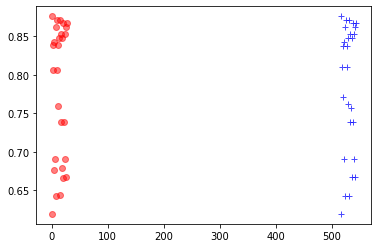

In [106]:
#Check and plot the 50 first predictions
plt.plot(y_validation_RF[0:50], '+', color ='blue', alpha=0.7)
plt.plot(predictions[0:50], 'ro', color ='red', alpha=0.5)
plt.show()

Neural Network with Keras
KERAS REGRESSION - NEURAL NETWORK

In [107]:
import keras

# Convert data as np.array
features = np.array(X_train)
targets = np.array(y_train)
features_validation= np.array(X_validation)
targets_validation = np.array(y_validation)

print(features[:10])
print(targets[:10])

[[5.         0.         0.         ... 0.         0.         0.        ]
 [1.         0.         0.61978972 ... 0.         0.         0.        ]
 [5.         0.         0.         ... 0.         0.         0.        ]
 ...
 [1.         0.         0.61077732 ... 0.         0.         0.        ]
 [5.         0.         0.         ... 0.         0.         0.        ]
 [1.         0.         0.60589558 ... 0.         0.         0.        ]]
[0.843  0.7856 0.838  0.8096 0.843  0.7856 0.843  0.7856 0.8525 0.7383]


In [108]:
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation

# Building the model
model = Sequential()
model.add(Dense(32, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dropout(.2))
model.add(Dense(16, activation='relu'))
model.add(Dropout(.1))
model.add(Dense(1))

# Compiling the model
model.compile(loss = 'mse', optimizer='adam', metrics=['mse']) #mse: mean_square_error
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 32)                12000     
                                                                 
 dropout_4 (Dropout)         (None, 32)                0         
                                                                 
 dense_7 (Dense)             (None, 16)                528       
                                                                 
 dropout_5 (Dropout)         (None, 16)                0         
                                                                 
 dense_8 (Dense)             (None, 1)                 17        
                                                                 
Total params: 12,545
Trainable params: 12,545
Non-trainable params: 0
_________________________________________________________________


In [109]:
# Training the model
epochs_tot = 1000
epochs_step = 250
epochs_ratio = int(epochs_tot / epochs_step)
hist =np.array([])

for i in range(epochs_ratio):
    history = model.fit(features, targets, epochs=epochs_step, batch_size=100, verbose=0)
    
    # Evaluating the model on the training and testing set
    print("Step : " , i * epochs_step, "/", epochs_tot)
    score = model.evaluate(features, targets)
    print("Training MSE:", score[1])
    score = model.evaluate(features_validation, targets_validation)
    print("Validation MSE:", score[1], "\n")
    #hist = np.concatenate((hist, np.array(history)), axis = 0)
    
# plot metrics
#plt.plot(hist)
#plt.show()

Step :  0 / 1000
17/17 [==============================] - 0s 2ms/step - loss: 8.2920e-04 - mse: 8.2920e-04
Training MSE: 0.0008292042766697705
1/1 [==============================] - 0s 19ms/step - loss: 0.0039 - mse: 0.0039
Validation MSE: 0.003885257989168167 

Step :  250 / 1000
17/17 [==============================] - 0s 2ms/step - loss: 6.7468e-04 - mse: 6.7468e-04
Training MSE: 0.0006746812141500413
1/1 [==============================] - 0s 20ms/step - loss: 0.0034 - mse: 0.0034
Validation MSE: 0.0033990503288805485 

Step :  500 / 1000
17/17 [==============================] - 0s 2ms/step - loss: 5.9024e-04 - mse: 5.9024e-04
Training MSE: 0.0005902352277189493
1/1 [==============================] - 0s 20ms/step - loss: 0.0028 - mse: 0.0028
Validation MSE: 0.0027986508794128895 

Step :  750 / 1000
17/17 [==============================] - 0s 2ms/step - loss: 8.8636e-04 - mse: 8.8636e-04
Training MSE: 0.0008863586117513478
1/1 [==============================] - 0s 20ms/step - loss: 

In [110]:
predictions = model.predict(features_validation, verbose=0)

print('R2 score = ',r2_score(y_validation, predictions), '/ 1.0')
print('MSE score = ',mean_squared_error(y_validation_RF, predictions), '/ 0.0')

R2 score =  0.7004648038040224 / 1.0
MSE score =  0.002087405 / 0.0


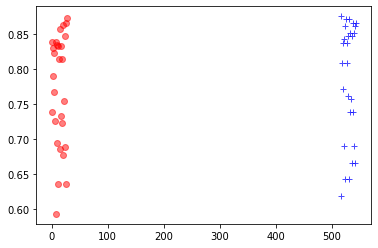

In [111]:
#Check and plot the 50 first predictions
plt.plot(y_validation[0:50], '+', color ='blue', alpha=0.7)
plt.plot(predictions[0:50], 'ro', color ='red', alpha=0.5)
plt.show()

In [97]:
y_validation

52     0.523926
259    0.666504
419    0.595215
64     0.261963
71     0.880859
522    0.690430
60     0.690430
396    0.738281
310    0.842773
187    0.690430
439    0.842773
8      0.852539
132    0.666504
102    0.861816
156    0.714355
449    0.852539
371    0.856934
383    0.837891
26     0.666504
146    0.542969
152    0.690430
33     0.880859
91     0.357178
42     0.643066
245    0.714355
460    0.571289
483    0.923828
120    0.875977
Name: sc_colli, dtype: float16

In [ ]:
#https://www.kaggle.com/code/kaggleslayer/grocery-prediction-with-neural-network/notebook

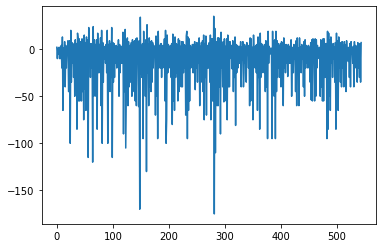

In [96]:
df4["sc_colli"].plot()